In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv("C:/Users/KIIT/OneDrive/Desktop/ARIF/KIIT DOCUMENTS/3rd Year/6th semester/TTL Lab/lab 10/train.csv")
dataset.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [2]:
X = dataset.iloc[:,:20].values
Y = dataset.iloc[:,20:21].values


In [3]:
X.shape


(2000, 20)

In [4]:
Y.shape

(2000, 1)

In [5]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X = sc.fit_transform(X)

In [6]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Y = ohe.fit_transform(Y).toarray()

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)


In [8]:
import keras
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(40,input_dim=20,activation='relu'))
model.add(Dense(20, activation='relu'))
model.add(Dense(4, activation='softmax'))


In [9]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [10]:
history= model.fit(X_train, Y_train,validation_data=(X_test,Y_test) ,batch_size=64, epochs=100)

Epoch 1/100
25/25 [==============================] - 1s 14ms/step - loss: 1.4131 - accuracy: 0.2719 - val_loss: 1.3777 - val_accuracy: 0.2950
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 1.3208 - accuracy: 0.3487 - val_loss: 1.3069 - val_accuracy: 0.3750
Epoch 3/100
25/25 [==============================] - 0s 5ms/step - loss: 1.2331 - accuracy: 0.4306 - val_loss: 1.2220 - val_accuracy: 0.4225
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 1.1295 - accuracy: 0.5081 - val_loss: 1.1154 - val_accuracy: 0.4775
Epoch 5/100
25/25 [==============================] - 0s 5ms/step - loss: 1.0100 - accuracy: 0.5831 - val_loss: 1.0035 - val_accuracy: 0.5325
Epoch 6/100
25/25 [==============================] - 0s 5ms/step - loss: 0.8913 - accuracy: 0.6400 - val_loss: 0.8976 - val_accuracy: 0.5900
Epoch 7/100
25/25 [==============================] - 0s 6ms/step - loss: 0.7857 - accuracy: 0.6950 - val_loss: 0.8040 - val_accuracy: 0.6450
Epoch 8/100


Epoch 59/100
25/25 [==============================] - 0s 4ms/step - loss: 0.0364 - accuracy: 0.9994 - val_loss: 0.2062 - val_accuracy: 0.9175
Epoch 60/100
25/25 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.9994 - val_loss: 0.2078 - val_accuracy: 0.9175
Epoch 61/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0342 - accuracy: 0.9994 - val_loss: 0.2075 - val_accuracy: 0.9175
Epoch 62/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0331 - accuracy: 0.9994 - val_loss: 0.2052 - val_accuracy: 0.9150
Epoch 63/100
25/25 [==============================] - 0s 5ms/step - loss: 0.0316 - accuracy: 0.9994 - val_loss: 0.2061 - val_accuracy: 0.9175
Epoch 64/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0308 - accuracy: 0.9994 - val_loss: 0.2099 - val_accuracy: 0.9175
Epoch 65/100
25/25 [==============================] - 0s 6ms/step - loss: 0.0301 - accuracy: 1.0000 - val_loss: 0.2090 - val_accuracy: 0.9225
Epoch 

In [11]:
Y_pred = model.predict(X_test)
pred= list()
for i in range(len(Y_pred)):
    pred.append(np.argmax(Y_pred[i]))
test= list()
for i in range(len(Y_test)):
    test.append(np.argmax(Y_test[i]))

13/13 [==============================] - 0s 2ms/step


In [12]:
from sklearn.metrics import accuracy_score
a= accuracy_score(pred,test)
print('Accuracy is :', a*100)

Accuracy is : 92.25


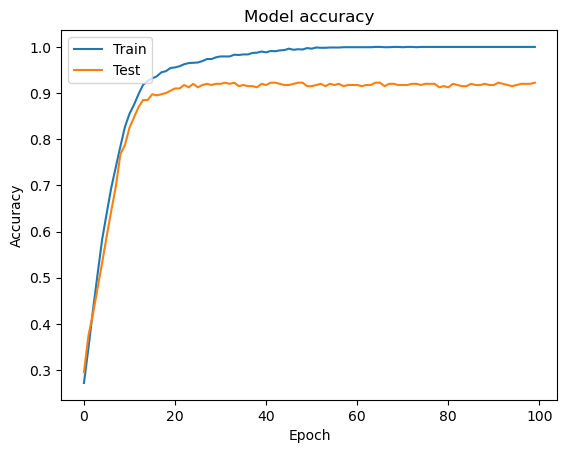

In [15]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()